<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#The-HiC_data-object" data-toc-modified-id="The-HiC_data-object-1">The HiC_data object</a></span></li><li><span><a href="#Filter-columns-with-too-few-interaction-count" data-toc-modified-id="Filter-columns-with-too-few-interaction-count-2">Filter columns with too few interaction count</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-3">Normalization</a></span><ul class="toc-item"><li><span><a href="#Other-normalizations" data-toc-modified-id="Other-normalizations-3.1">Other normalizations</a></span></li></ul></li><li><span><a href="#Save-raw-and-normalized-matrices" data-toc-modified-id="Save-raw-and-normalized-matrices-4">Save raw and normalized matrices</a></span><ul class="toc-item"><li><span><a href="#Save-biases-and-bin-filtering" data-toc-modified-id="Save-biases-and-bin-filtering-4.1">Save biases and bin filtering</a></span></li><li><span><a href="#Save-normalized-chromosome/genome-matrices" data-toc-modified-id="Save-normalized-chromosome/genome-matrices-4.2">Save normalized chromosome/genome matrices</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-5">References</a></span></li></ul></div>

# The HiC_data object

In [1]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads

In [2]:
cell = 'mouse_B'
rep = 'rep1'
reso = 1000000

In [3]:
hic_data = load_hic_data_from_reads(
    'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep),
    reso)

# Filter columns with too few interaction count

For this, very sparse, example dataset we are going to ask for very few interactions per bin.

This can be done either by setting `min_perc` asking for each bin to contain a minimum percentage of cells with interaction data. Or but setting `min_count` asking that the number of cells with interaction data of each bin is above the defined cutoff.


     1     2     3    23    67    68    69   196   197   198   199   372   373   379   380   381   382   489   540   541
   542   543   583   601   602   670   671   683   687   690   691   698   699   700   709   792   793   829   850   851
   852   994   995   996   997   998   999  1000  1001  1002  1003  1007  1008  1009  1020  1021  1022  1032  1146  1147
  1148  1275  1276  1277  1278  1400  1401  1402  1403  1532  1533  1534  1602  1605  1619  1620  1621  1654  1655  1656
  1657  1673  1674  1675  1677  1678  1775  1776  1777  1778  1842  1896  1897  1898  1899  1900  1901  1902  1903  1939
  1950  2022  2023  2024  2126  2127  2128  2129  2145  2221  2222  2225  2226  2227  2228  2254  2260  2261  2262  2263
  2281  2321  2322  2323  2412  2413  2414  2474  2475  2476  2477  2478  2499  2500  2501  2502  2503  2504  2505  2506
  2507  2508  2511  2528  2529  2597  2598  2599  2622  2623  2644  2645  2646  2647  2648  2649  2650  2651  2652  2653
  2654  2655  2656  2657  2658 

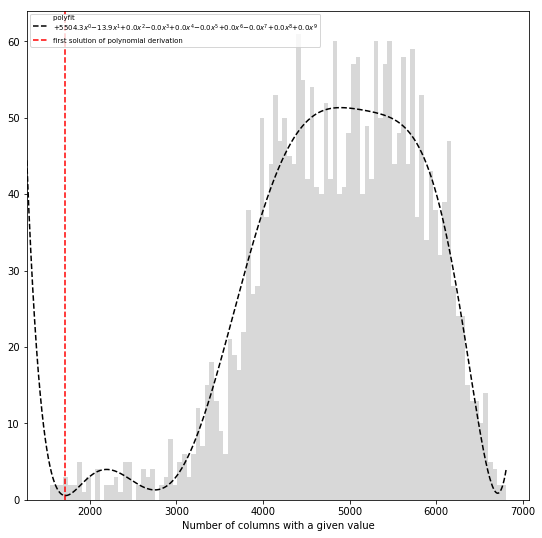

Found 251 of 2738 columns with poor signal


/home/participant/miniconda2/lib/python2.7/site-packages/pytadbit/utils/hic_filtering.py:149: ComplexWarning: Casting complex values to real discards the imaginary part
  round(root, 3), ' '.join(

     1     2     3    23    67    68    69   196   197   198   199   372   373   374   379   380   381   382   489   540
   541   542   543   583   601   602   670   671   683   687   690   691   697   698   699   700   709   792   793   829
   850   851   852   994   995   996   997   998   999  1000  1001  1002  1003  1007  1008  1009  1020  1021  1022  1032
  1146  1147  1148  1275  1276  1277  1278  1400  1401  1402  1403  1532  1533  1534  1602  1605  1619  1620  1621  1654
  1655  1656  1657  1673  1674  1675  1677  1678  1775  1776  1777  1778  1842  1896  1897  1898  1899  1900  1901  1902
  1903  1939  1940  1950  2022  2023  2024  2126  2127  2128  2129  2145  2221  2222  2225  2226  2227  2228  2254  2260
  2261  2262  2263  2281  2321  2322  2323  2412  2413  2414  2473  2474  24

In [4]:
hic_data.filter_columns(draw_hist=True, by_mean=True)

In [5]:
print len(hic_data)
print len(hic_data.bads)

2738
251


# Normalization

As normalization we use either the ICE normalization <a name="ref-1"/>[(Imakaev et al., 2012)](#cite-Imakaev2012a) with a "full" normalization until the sum of all columns of the matrix are equal, or something more similar to the _vanilla_ normalization used in <a name="ref-2"/>[(Rao et al., 2014)](#cite-Rao2014) which is exactly like running the ICE normalization without iterations.

_Note: if columns with a lot of zeroes are present the ICE normalization will last very long to converge, and these low-coverage columns will present, at the end of the normalization, few cells with very high values of interaction_

In [6]:
hic_data.normalize_hic(iterations=100, max_dev=0.00001)

iterative correction
  - copying matrix
  - computing biases
          1724.000        4906.723        6808.000    0   0.64865
          4118.103        4987.135        7015.538    1   0.40673
          4206.295        5009.362        5598.427    2   0.16031
          4688.876        5016.586        5549.911    3   0.10631
          4708.745        5019.242        5221.581    4   0.06186
          4901.226        5020.255        5229.657    5   0.04171
          4888.294        5020.660        5093.344    6   0.02636
          4977.479        5020.824        5109.318    7   0.01763
          4963.480        5020.892        5047.071    8   0.01143
          5005.213        5020.921        5059.048    9   0.00759
          4995.949        5020.933        5030.410   10   0.00498
          5015.222        5020.938        5037.474   11   0.00329
          5010.059        5020.940        5024.399   12   0.00217
          5018.844        5020.941        5028.132   13   0.00143
          5016.

At 100 kb itmakes no sense to view the full matrix (your matrix will have more cells than your screen have pixels).

Try plotting a region of the genome only, with the `focus` parameter.

/home/participant/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/home/participant/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


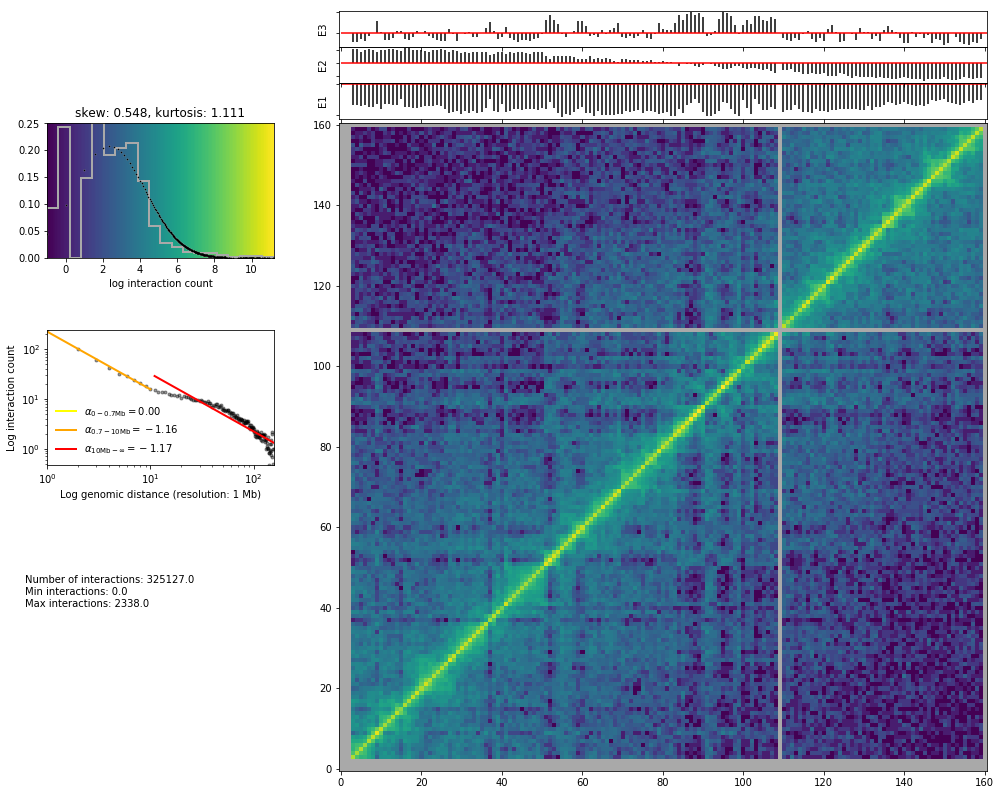

In [7]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=False, focus='chr3', show=True, cmap='viridis')

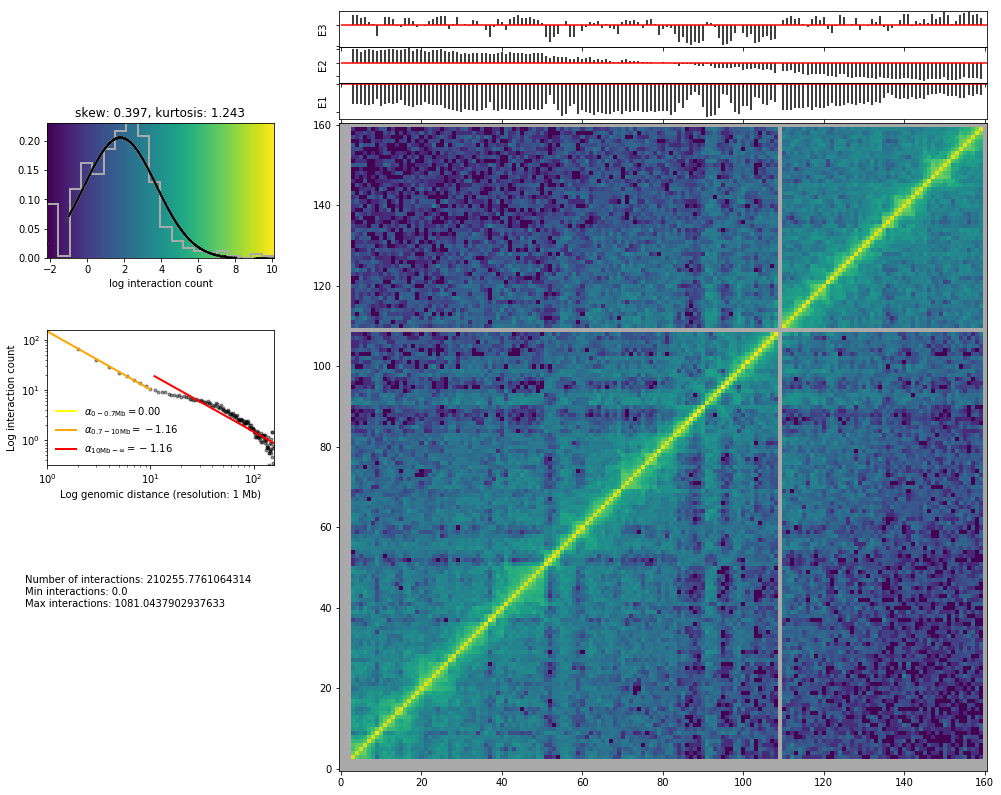

In [8]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus='chr3', show=True, cmap='viridis')

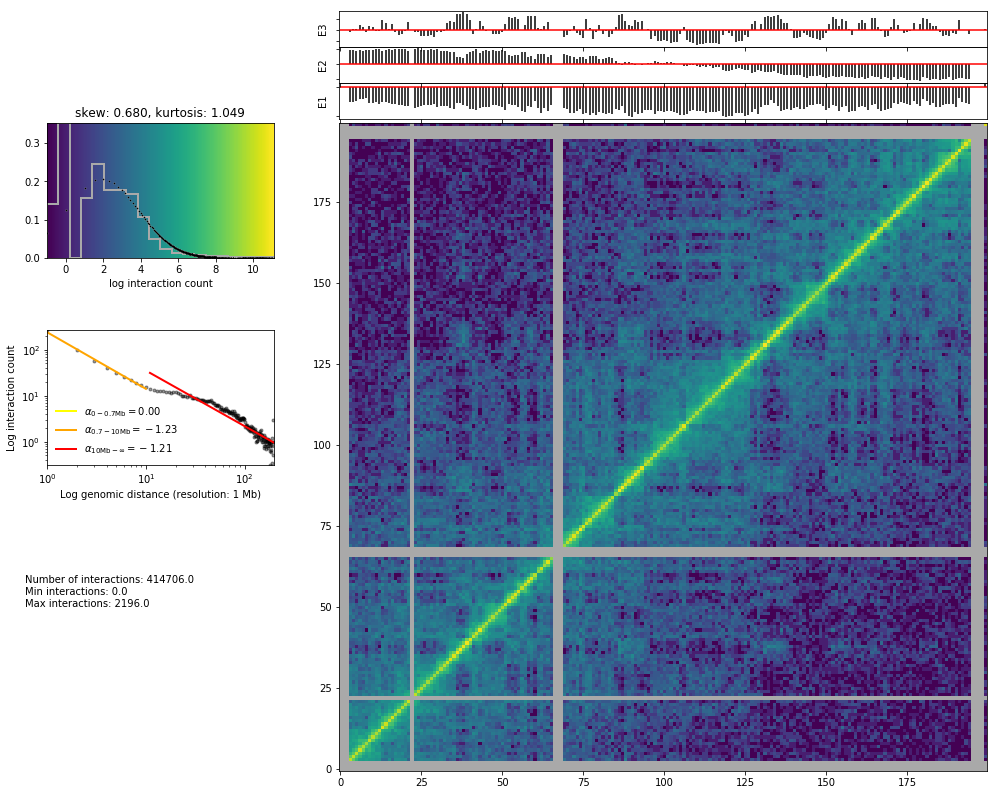

In [9]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=False, focus=(1, 200), show=True, cmap='viridis')

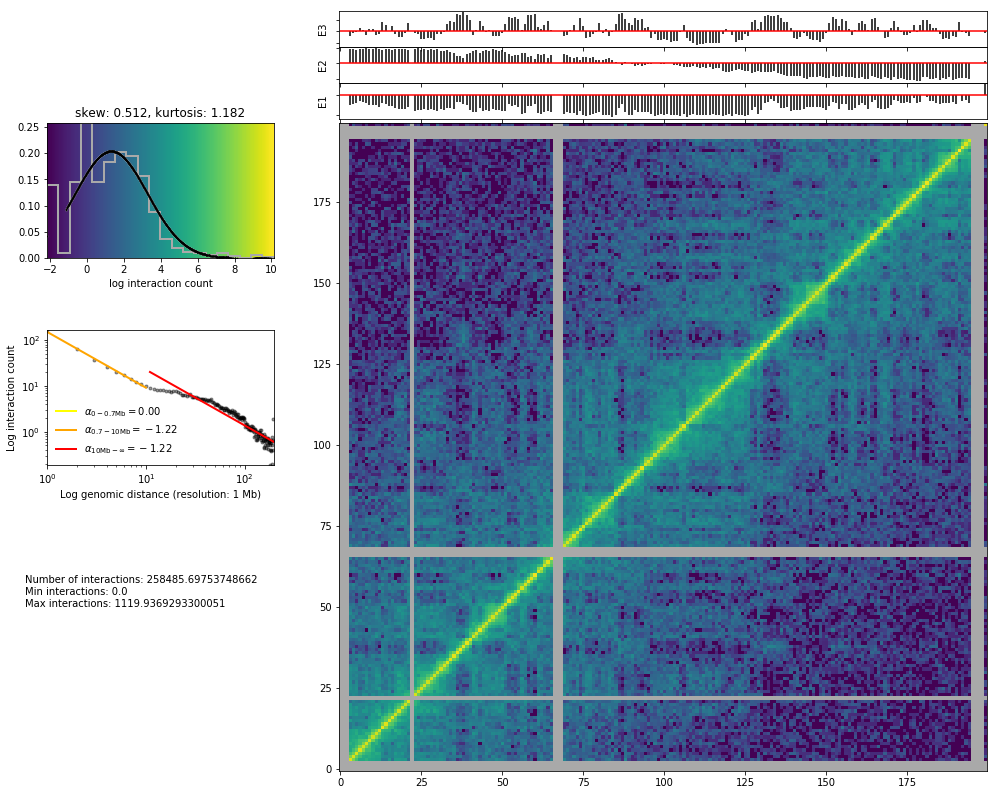

In [10]:
from pytadbit.mapping.analyze import hic_map

hic_map(hic_data, normalized=True, focus=(1, 200), show=True, cmap='viridis')

## Other normalizations

ICE normalization is widely used however other, more convaluted, normalizations <a name="ref-1"/>[(Hu et al., 2012)](#cite-hu2012hicnorm) <a name="ref-2"/>[(Yaffe and Tanay, 2011)](#cite-Yaffe2011) can be used outside TADbit and then added as normalized matrices.

# Save raw and normalized matrices

## Save biases and bin filtering

In [11]:
from cPickle import dump

In [12]:
! mkdir -p results/fragment/$cell\_$rep/04_normalizing

Save biases to separate file.

In [13]:
out = open('results/fragment/{1}_{2}/04_normalizing/biases_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
dump(hic_data.bias, out)
out.close()

Save "bad" columns to an other file

In [14]:
out = open('results/fragment/{1}_{2}/04_normalizing/bad_columns_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
dump(hic_data.bads, out)
out.close()

## Save normalized chromosome/genome matrices

This time we do not need to save appart the normalization biases and the list of columns with poor signal.

In [15]:
hic_map(hic_data, by_chrom='intra', normalized=False,
       savedata='results/fragment/{1}_{2}/04_normalizing/{0}_raw'.format(reso, cell, rep))

In [16]:
hic_map(hic_data, by_chrom='intra', normalized=True,
       savedata='results/fragment/{1}_{2}/04_normalizing/{0}_norm'.format(reso, cell, rep))

## Normalize everything at many resolutions

In [20]:
for reso in [100000, 200000, 1000000]:
    for cell in ['mouse_B', 'mouse_PSC']:
        for rep in ['rep1', 'rep2']:
            print rep, cell, reso
            hic_data = load_hic_data_from_reads(
                'results/fragment/{0}_{1}/03_filtering/valid_reads12_{0}_{1}.tsv'.format(cell, rep),
                reso)
            hic_data.filter_columns(silent=True, by_mean=True, min_count=10)
            hic_data.normalize_hic(iterations=0, max_dev=0.00001)
            out = open('results/fragment/{1}_{2}/04_normalizing/biases_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
            dump(hic_data.bias, out)
            out.close()
            
            out = open('results/fragment/{1}_{2}/04_normalizing/bad_columns_{0}_{1}_{2}.pick'.format(reso, cell, rep), 'w')
            dump(hic_data.bads, out)
            out.close()

rep1 mouse_B 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 25641.554
  - rescaling biases
rep2 mouse_B 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 25570.117
  - rescaling biases
rep1 mouse_PSC 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 27077.169
  - rescaling biases
rep2 mouse_PSC 100000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 26087.885
  - rescaling biases
rep1 mouse_B 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 12986.538
  - rescaling biases
rep2 mouse_B 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 12849.185
  - rescaling biases
rep1 mouse_PSC 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13602.314
  - rescaling biases
rep2 mouse_PSC 200000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 13321.069
  - rescaling biases
rep1 mouse_B 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2619.418
  - rescaling biases
rep2 mouse_B 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2619.118
  - rescaling biases
rep1 mouse_PSC 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2772.102
  - rescaling biases
rep2 mouse_PSC 1000000


iterative correction
  - copying matrix
  - computing biases
rescaling to factor 1
  - getting the sum of the matrix
    => 2755.464
  - rescaling biases


<!--bibtex
@article{hu2012hicnorm,
  title={HiCNorm: removing biases in Hi-C data via Poisson regression},
  author={Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S},
  journal={Bioinformatics},
  volume={28},
  number={23},
  pages={3131--3133},
  year={2012},
  publisher={Oxford Univ Press}
}
@article{Yaffe2011,
abstract = {Hi-C experiments measure the probability of physical proximity between pairs of chromosomal loci on a genomic scale. We report on several systematic biases that substantially affect the Hi-C experimental procedure, including the distance between restriction sites, the GC content of trimmed ligation junctions and sequence uniqueness. To address these biases, we introduce an integrated probabilistic background model and develop algorithms to estimate its parameters and renormalize Hi-C data. Analysis of corrected human lymphoblast contact maps provides genome-wide evidence for interchromosomal aggregation of active chromatin marks, including DNase-hypersensitive sites and transcriptionally active foci. We observe extensive long-range (up to 400 kb) cis interactions at active promoters and derive asymmetric contact profiles next to transcription start sites and CTCF binding sites. Clusters of interacting chromosomal domains suggest physical separation of centromere-proximal and centromere-distal regions. These results provide a computational basis for the inference of chromosomal architectures from Hi-C experiments.},
author = {Yaffe, Eitan and Tanay, Amos},
doi = {10.1038/ng.947},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Yaffe, Tanay - 2011 - Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal archit.pdf:pdf},
issn = {1546-1718},
journal = {Nature genetics},
keywords = {Binding Sites,Chromosomes,Cluster Analysis,Epigenesis,Genetic,Human,Humans,Lymphocytes,Lymphocytes: ultrastructure,Models,Probability},
mendeley-groups = {Research articles},
month = {nov},
number = {11},
pages = {1059--65},
pmid = {22001755},
title = {{Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22001755},
volume = {43},
year = {2011}
}
@article{Imakaev2012a,
abstract = {Extracting biologically meaningful information from chromosomal interactions obtained with genome-wide chromosome conformation capture (3C) analyses requires the elimination of systematic biases. We present a computational pipeline that integrates a strategy to map sequencing reads with a data-driven method for iterative correction of biases, yielding genome-wide maps of relative contact probabilities. We validate this ICE (iterative correction and eigenvector decomposition) technique on published data obtained by the high-throughput 3C method Hi-C, and we demonstrate that eigenvector decomposition of the obtained maps provides insights into local chromatin states, global patterns of chromosomal interactions, and the conserved organization of human and mouse chromosomes.},
author = {Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A},
doi = {10.1038/nmeth.2148},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Imakaev et al. - 2012 - Iterative correction of Hi-C data reveals hallmarks of chromosome organization.pdf:pdf},
issn = {1548-7105},
journal = {Nature methods},
keywords = {Hi-C},
mendeley-groups = {stats/Hi-C,Research articles},
mendeley-tags = {Hi-C},
month = {oct},
number = {10},
pages = {999--1003},
pmid = {22941365},
title = {{Iterative correction of Hi-C data reveals hallmarks of chromosome organization.}},
url = {http://www.ncbi.nlm.nih.gov/pubmed/22941365},
volume = {9},
year = {2012}
}
@article{Rao2014,
author = {Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and {James T. Robinson} and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez},
doi = {10.1016/j.cell.2014.11.021},
file = {:home/fransua/.local/share/data/Mendeley Ltd./Mendeley Desktop/Downloaded/Rao et al. - 2014 - A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping.pdf:pdf},
issn = {0092-8674},
journal = {Cell},
keywords = {Hi-C},
mendeley-groups = {Research articles,projects/GEVO/CTCF},
mendeley-tags = {Hi-C},
number = {7},
pages = {1665--1680},
pmid = {25497547},
publisher = {Elsevier Inc.},
title = {{A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping}},
url = {http://dx.doi.org/10.1016/j.cell.2014.11.021},
volume = {159},
year = {2014}
}

-->

# References

<a name="cite-Imakaev2012a"/><sup>[^](#ref-1) </sup>Imakaev, Maxim V and Fudenberg, Geoffrey and McCord, Rachel Patton and Naumova, Natalia and Goloborodko, Anton and Lajoie, Bryan R and Dekker, Job and Mirny, Leonid A. 2012. _Iterative correction of Hi-C data reveals hallmarks of chromosome organization._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22941365)

<a name="cite-Rao2014"/><sup>[^](#ref-2) </sup>Rao, Suhas S P and Huntley, Miriam H and Durand, Neva C and Stamenova, Elena K and Bochkov, Ivan D. and James T. Robinson and Sanborn, Adrian L. and Machol, Ido and Omer, Arina D. and Lander, Eric S. and Lieberman-Aiden, Erez. 2014. _A 3D Map of the Human Genome at Kilobase Resolution Reveals Principles of Chromatin Looping_. [URL](http://dx.doi.org/10.1016/j.cell.2014.11.021)

<a name="cite-hu2012hicnorm"/><sup>[^](#ref-3) </sup>Hu, Ming and Deng, Ke and Selvaraj, Siddarth and Qin, Zhaohui and Ren, Bing and Liu, Jun S. 2012. _HiCNorm: removing biases in Hi-C data via Poisson regression_.

<a name="cite-Yaffe2011"/><sup>[^](#ref-4) </sup>Yaffe, Eitan and Tanay, Amos. 2011. _Probabilistic modeling of Hi-C contact maps eliminates systematic biases to characterize global chromosomal architecture._. [URL](http://www.ncbi.nlm.nih.gov/pubmed/22001755)

